In [1]:
!pip3 install --upgrade fastai


In [3]:
!pip install fast_tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.3 MB/s eta 0:00:00


# **Import Necessary Library**

In [56]:
from fastai.tabular.all import *
from fast_tabnet.core import *
from pathlib import Path

# **Load, Read Data**

In [57]:
root = "/kaggle/input/patient/dataset.csv"


df = pd.read_csv(root)
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [58]:
df.info

<bound method DataFrame.info of        encounter_id  patient_id  hospital_id   age        bmi  \
0             66154       25312          118  68.0  22.730000   
1            114252       59342           81  77.0  27.420000   
2            119783       50777          118  25.0  31.950000   
3             79267       46918          118  81.0  22.640000   
4             92056       34377           33  19.0        NaN   
...             ...         ...          ...   ...        ...   
91708         91592       78108           30  75.0  23.060250   
91709         66119       13486          121  56.0  47.179671   
91710          8981       58179          195  48.0  27.236914   
91711         33776      120598           66   NaN  23.297481   
91712          1671       53612          104  82.0  22.031250   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
0                     0  Caucasian      M   180.3                      Floor   
1                     0  Ca

In [59]:
df.describe

<bound method NDFrame.describe of        encounter_id  patient_id  hospital_id   age        bmi  \
0             66154       25312          118  68.0  22.730000   
1            114252       59342           81  77.0  27.420000   
2            119783       50777          118  25.0  31.950000   
3             79267       46918          118  81.0  22.640000   
4             92056       34377           33  19.0        NaN   
...             ...         ...          ...   ...        ...   
91708         91592       78108           30  75.0  23.060250   
91709         66119       13486          121  56.0  47.179671   
91710          8981       58179          195  48.0  27.236914   
91711         33776      120598           66   NaN  23.297481   
91712          1671       53612          104  82.0  22.031250   

       elective_surgery  ethnicity gender  height           icu_admit_source  \
0                     0  Caucasian      M   180.3                      Floor   
1                     0  

In [60]:
df["hospital_death"].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [61]:
dep_var = "hospital_death"

In [62]:
continuous_vars, categorical_vars = cont_cat_split(df, dep_var=dep_var)

In [87]:
df[continuous_vars].info

<bound method DataFrame.info of         age        bmi  height  icu_id  pre_icu_los_days  weight  \
0      68.0  22.730000   180.3      92          0.541667    73.9   
1      77.0  27.420000   160.0      90          0.927778    70.2   
2      25.0  31.950000   172.7      93          0.000694    95.3   
3      81.0  22.640000   165.1      92          0.000694    61.7   
4      19.0        NaN   188.0      91          0.073611     NaN   
...     ...        ...     ...     ...               ...     ...   
91708  75.0  23.060250   177.8     927          0.298611    72.9   
91709  56.0  47.179671   183.0     925          0.120139   158.0   
91710  48.0  27.236914   170.2     908          0.046528    78.9   
91711   NaN  23.297481   154.9     922          0.081944    55.9   
91712  82.0  22.031250   160.0     926          0.018056    56.4   

       apache_2_diagnosis  apache_3j_diagnosis  arf_apache  gcs_eyes_apache  \
0                   113.0               502.01         0.0              

In [64]:
continuous_vars.remove("encounter_id")

In [65]:
continuous_vars.remove("patient_id")
continuous_vars.remove("hospital_id")


In [88]:
continuous_vars.remove("Unnamed: 83")

In [89]:
df[continuous_vars].nunique()

age                               74
bmi                            34888
height                           401
icu_id                           241
pre_icu_los_days                9757
                               ...  
hepatic_failure                    2
immunosuppression                  2
leukemia                           2
lymphoma                           2
solid_tumor_with_metastasis        2
Length: 71, dtype: int64

In [90]:
df[categorical_vars].nunique()

elective_surgery          2
ethnicity                 6
gender                    2
icu_admit_source          5
icu_stay_type             3
icu_type                  8
apache_post_operative     2
apache_3j_bodysystem     11
apache_2_bodysystem      10
dtype: int64

# **Build the Model**

In [196]:
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = categorical_vars,
                   cont_names = continuous_vars,
                   y_names='hospital_death',
                   y_block=CategoryBlock(),
                   splits=splits)

In [197]:
to.xs.iloc[:2]

,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,apache_3j_bodysystem,apache_2_bodysystem,age_na,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
39201,1,1,1,1,1,8,1,8,5,1,...,1.801500,1.340857,-0.028846,-0.126243,-0.535309,-0.114959,-0.164582,-0.083416,-0.064609,-0.145154
4905,1,3,1,1,1,7,1,11,8,1,...,-0.097247,-0.054924,-0.028846,-0.126243,1.868079,-0.114959,-0.164582,-0.083416,-0.064609,-0.145154


In [198]:
dls = to.dataloaders(bs=1000)

In [199]:
dls.show_batch()

,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,apache_3j_bodysystem,apache_2_bodysystem,age_na,bmi_na,height_na,weight_na,apache_2_diagnosis_na,apache_3j_diagnosis_na,arf_apache_na,gcs_eyes_apache_na,gcs_motor_apache_na,gcs_unable_apache_na,gcs_verbal_apache_na,heart_rate_apache_na,intubated_apache_na,map_apache_na,resprate_apache_na,temp_apache_na,ventilated_apache_na,d1_diasbp_max_na,d1_diasbp_min_na,d1_diasbp_noninvasive_max_na,d1_diasbp_noninvasive_min_na,d1_heartrate_max_na,d1_heartrate_min_na,d1_mbp_max_na,d1_mbp_min_na,d1_mbp_noninvasive_max_na,d1_mbp_noninvasive_min_na,d1_resprate_max_na,d1_resprate_min_na,d1_spo2_max_na,d1_spo2_min_na,d1_sysbp_max_na,d1_sysbp_min_na,d1_sysbp_noninvasive_max_na,d1_sysbp_noninvasive_min_na,d1_temp_max_na,d1_temp_min_na,h1_diasbp_max_na,h1_diasbp_min_na,h1_diasbp_noninvasive_max_na,h1_diasbp_noninvasive_min_na,h1_heartrate_max_na,h1_heartrate_min_na,h1_mbp_max_na,h1_mbp_min_na,h1_mbp_noninvasive_max_na,h1_mbp_noninvasive_min_na,h1_resprate_max_na,h1_resprate_min_na,h1_spo2_max_na,h1_spo2_min_na,h1_sysbp_max_na,h1_sysbp_min_na,h1_sysbp_noninvasive_max_na,h1_sysbp_noninvasive_min_na,d1_glucose_max_na,d1_glucose_min_na,d1_potassium_max_na,d1_potassium_min_na,apache_4a_hospital_death_prob_na,apache_4a_icu_death_prob_na,aids_na,cirrhosis_na,diabetes_mellitus_na,hepatic_failure_na,immunosuppression_na,leukemia_na,lymphoma_na,solid_tumor_with_metastasis_na,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,0,Caucasian,M,Accident & Emergency,admit,SICU,0,Respiratory,Respiratory,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,True,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,84.999999,21.099022,177.800003,474.000001,0.011806,66.699997,303.000003,208.009992,-3.871353e-11,4.0,6.0,6.354369e-11,5.0,54.000001,4.839658e-09,78.000000,29.0,35.799999,-1.095710e-08,95.000000,56.0,95.000000,56.0,79.000001,54.000000,112.000000,78.0,112.000000,78.0,29.0,12.0,99.0,91.0,143.000000,107.0,143.000000,107.000000,36.299999,35.799999,74.000000,62.0,74.000000,62.000000,59.0,54.000000,90.000000,78.000000,90.000000,79.000000,26.0,17.0,97.0,96.0,131.000000,115.000000,130.000000,115.000000,141.000000,121.000000,3.9,3.6,2.000000e-02,9.999999e-03,-1.616501e-12,3.134601e-10,-9.121051e-09,2.090374e-10,5.881857e-10,-6.136061e-11,6.953751e-11,-7.440678e-10,0
1,0,African American,M,Floor,admit,CTICU,0,#na#,#na#,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [200]:
dls.valid.show_batch()

,elective_surgery,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_post_operative,apache_3j_bodysystem,apache_2_bodysystem,age_na,bmi_na,height_na,weight_na,apache_2_diagnosis_na,apache_3j_diagnosis_na,arf_apache_na,gcs_eyes_apache_na,gcs_motor_apache_na,gcs_unable_apache_na,gcs_verbal_apache_na,heart_rate_apache_na,intubated_apache_na,map_apache_na,resprate_apache_na,temp_apache_na,ventilated_apache_na,d1_diasbp_max_na,d1_diasbp_min_na,d1_diasbp_noninvasive_max_na,d1_diasbp_noninvasive_min_na,d1_heartrate_max_na,d1_heartrate_min_na,d1_mbp_max_na,d1_mbp_min_na,d1_mbp_noninvasive_max_na,d1_mbp_noninvasive_min_na,d1_resprate_max_na,d1_resprate_min_na,d1_spo2_max_na,d1_spo2_min_na,d1_sysbp_max_na,d1_sysbp_min_na,d1_sysbp_noninvasive_max_na,d1_sysbp_noninvasive_min_na,d1_temp_max_na,d1_temp_min_na,h1_diasbp_max_na,h1_diasbp_min_na,h1_diasbp_noninvasive_max_na,h1_diasbp_noninvasive_min_na,h1_heartrate_max_na,h1_heartrate_min_na,h1_mbp_max_na,h1_mbp_min_na,h1_mbp_noninvasive_max_na,h1_mbp_noninvasive_min_na,h1_resprate_max_na,h1_resprate_min_na,h1_spo2_max_na,h1_spo2_min_na,h1_sysbp_max_na,h1_sysbp_min_na,h1_sysbp_noninvasive_max_na,h1_sysbp_noninvasive_min_na,d1_glucose_max_na,d1_glucose_min_na,d1_potassium_max_na,d1_potassium_min_na,apache_4a_hospital_death_prob_na,apache_4a_icu_death_prob_na,aids_na,cirrhosis_na,diabetes_mellitus_na,hepatic_failure_na,immunosuppression_na,leukemia_na,lymphoma_na,solid_tumor_with_metastasis_na,age,bmi,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
0,0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,0,Neurological,Neurologic,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,65.000000,67.814986,137.199998,375.999994,6.944453e-03,92.000000,300.999998,403.010016,-3.871353e-11,3.0,5.0,6.354369e-11,4.0,101.000000,4.839658e-09,149.999999,25.000000,36.599998,-1.095710e-08,123.000000,38.000000,123.000001,38.000000,100.000000,63.000000,131.000001,48.000001,131.000000,48.000000,22.0,14.0,100.0,90.000000,167.000000,80.000000,167.000000,80.000000,36.700001,36.599998,71.000000,52.000000,71.0,52.000000,100.000000,85.000000,81.000000,64.000000,81.000000,64.000000,21.0,18.0,99.0,93.0,132.000000,99.000000,132.000000,98.999999,115.000002,92.000000,3.7,3.6,0.05,0.02,-1.616501e-12,3.134601e-10,-9.121051e-09,2.090374e-10,5.881857e-10,-6.136061e-11,6.953751e-11,-7.440678e-10,0
1,0,Caucasian,F,Other Hospital,admit,Med-Surg ICU,0,Metabolic,Metabolic,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [201]:
learn = tabular_learner(dls,layers=[300,200,100],wd=0.01,train_bn=True, metrics=[accuracy])

# **Find learning rate and finetuning**

SuggestedLRs(valley=0.0012022644514217973)

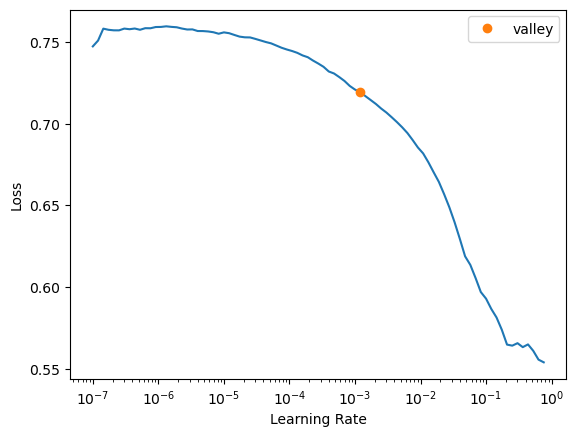

In [202]:
learn.lr_find()

In [203]:
learn.fine_tune(5,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.609995,0.494776,0.880329,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.468286,0.421452,0.911187,00:02
1,0.359658,0.301269,0.917130,00:02
2,0.259264,0.237757,0.922909,00:02
3,0.202408,0.226610,0.923236,00:02
4,0.173427,0.222833,0.925417,00:02


SuggestedLRs(valley=0.0003311311302240938)

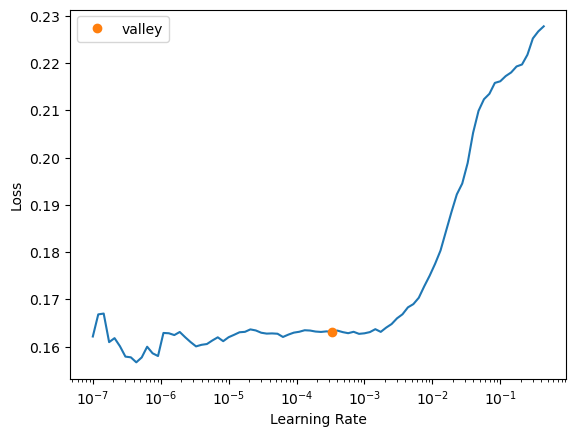

In [204]:
learn.lr_find()

In [205]:
learn.fit_one_cycle(6,lr_max=3e-7)

epoch,train_loss,valid_loss,accuracy,time
0,0.163293,0.224592,0.925035,00:02
1,0.163194,0.223552,0.925417,00:02
2,0.163034,0.222055,0.925799,00:02
3,0.163014,0.224933,0.924436,00:02
4,0.162330,0.223481,0.925472,00:02
5,0.162548,0.223029,0.925090,00:02


# **Confusion Matrix**

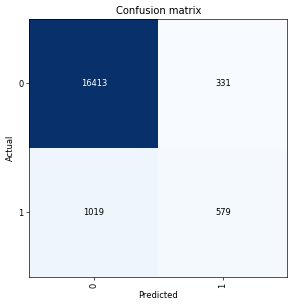

In [232]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=60)

In [241]:
learn.export('myModel.pkl')